In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
#from clim680_function import xyticks
import pymannkendall as mk

In [4]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/shtotal_climo.nc'
DS_sh_tot=xr.open_dataset(f)
sh_tot850=DS_sh_tot['__xarray_dataarray_variable__']
sh_tot850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-644161.2   , -672322.75  , -698401.    , ...,  148575.08  ,
         136801.78  ,  127034.61  ],
       [-670036.5   , -700519.    , -728724.06  , ...,  173541.4   ,
         160320.    ,  149927.83  ],
       [-694442.3   , -727038.    , -757629.2   , ...,  199117.86  ,
         185936.61  ,  174819.81  ],
       ...,
       [1367595.    , 1242338.8   , 1252119.2   , ...,  171388.84  ,
          -3572.7405,  -37316.438 ],
       [1322879.4   ,  995666.44  ,  388150.22  , ...,  117491.75  ,
          37713.77  ,  -87573.31  ],
       [ 375433.9   ,    8213.18  ,  295107.06  , ..., -101956.52  ,
         -92001.67  ,  -99265.04  ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
    lev      float64 ...

In [9]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/lh_climo_total.nc'
DS_lh_tot=xr.open_dataset(f)
lh_tot850=DS_lh_tot['__xarray_dataarray_variable__']
lh_tot850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55, lon: 113)>
array([[-11906.346289, -12113.189823, -12232.613373, ...,  12077.542887,
         11357.01015 ,  10812.417731],
       [-12332.717125, -12561.283953, -12750.711013, ...,  13606.588722,
         12830.023479,  12258.331168],
       [-12772.74081 , -13021.603233, -13246.492146, ...,  15246.172108,
         14435.421616,  13808.696287],
       ...,
       [ 45957.097314,  41527.949358,  41268.475203, ...,  13041.693585,
         10385.093785,  10106.027244],
       [ 43584.492942,  31844.890311,  12607.058482, ...,  10740.604399,
          9999.420985,   8506.994754],
       [ 12397.198808,   1372.50106 ,   4329.878151, ...,   6727.120578,
          6835.327947,   6942.293048]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 ...

In [10]:
zonal_mean_lh=lh_tot850.mean(dim='lon')
zonal_mean_lh

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55)>
array([20066.4054025 , 20770.06626401, 21385.54037465, 22485.61579609,
       23227.80697542, 24094.49116897, 24836.17613457, 25760.37817684,
       26133.78148064, 26601.9205577 , 26522.59099091, 26799.86486962,
       26596.28647497, 26337.7252199 , 26062.59126584, 25881.15135463,
       25613.49590484, 25655.75522835, 25704.40299985, 26326.90620869,
       25932.59467955, 25261.33625853, 25156.95750812, 25385.64731254,
       25665.73436844, 23551.51624242, 23824.25088947, 23848.42321003,
       23625.06530427, 22576.57563423, 21047.25642267, 19414.4651738 ,
       18031.7119453 , 17375.17494822, 16068.37967575, 15891.62040186,
       14536.58703642, 12893.25511064, 12028.4999315 , 11671.39802651,
       11435.7695395 , 10099.1988049 ,  9426.85906687,  8567.76943122,
        7724.05899446,  7185.85345747,  6868.00484694,  6334.59880262,
        5120.06207278,  4338.22777033,  3741.38759653,  2540.47314124,
        1366.36814232,   302.55881008,  -335.18438125])
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 850.0

In [11]:
zonal_mean_sh=sh_tot850.mean(dim='lon')
zonal_mean_sh

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 55)>
array([ 132037.05 ,  139885.16 ,  146457.67 ,  160225.94 ,  163096.56 ,
        169468.28 ,  174964.   ,  187765.98 ,  186700.53 ,  191149.44 ,
        184511.98 ,  181803.75 ,  179349.7  ,  176166.4  ,  170341.12 ,
        170758.53 ,  165321.66 ,  162567.89 ,  157898.94 ,  164048.6  ,
        156918.97 ,  135248.78 ,  146220.83 ,  157094.58 ,  167945.17 ,
        118279.32 ,   99029.8  ,  104390.68 ,  107170.69 ,  101421.375,
         60066.918,   37928.57 ,    6799.317,   -5345.011,  -36737.863,
        -19413.008,  -10787.473,  -43263.684,  -62419.637,  -81005.93 ,
        -92067.93 , -138597.89 , -145990.94 , -164590.38 , -179917.17 ,
       -180612.   , -193975.8  , -218699.16 , -265922.6  , -292083.4  ,
       -303963.25 , -354473.62 , -401965.25 , -465966.97 , -468069.56 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 49.5 50.0 50.5 51.0 51.5
    lev      float64 850.0

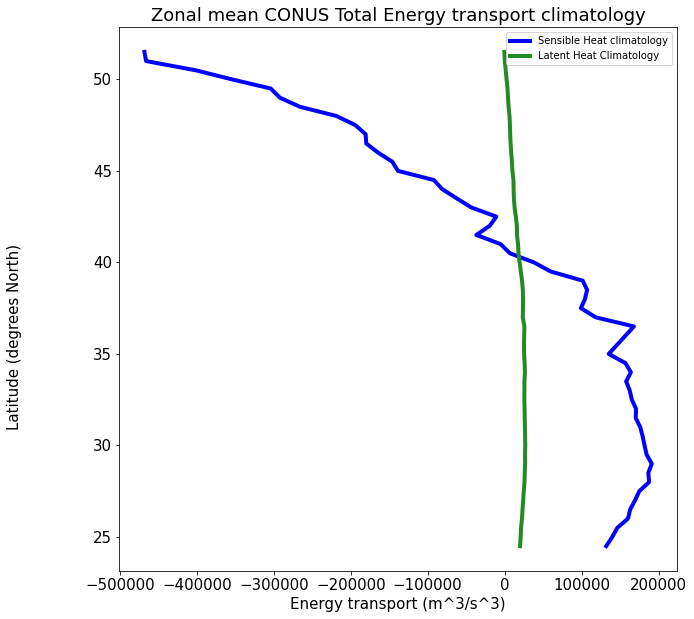

In [19]:
#Sensible heat
plt.figure(figsize=(10,10))
plt.title("Zonal mean CONUS Total Energy transport climatology",fontsize=18)
plt.plot(zonal_mean_sh,zonal_mean_sh['lat'],label='Sensible Heat climatology',linewidth=4,color='blue')
plt.xlabel('Energy transport (m^3/s^3)',fontsize=15)
#plt.ylabel('Z (meters)',fontsize=15,rotation='90')
plt.gcf().text(-0.02,0.45, "Latitude (degrees North)", ha="center", va="center", rotation=90, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(zonal_mean_lh,zonal_mean_lh['lat'],label='Latent Heat Climatology ',linewidth=4,color='forestgreen')
plt.legend()

### Transients

In [15]:
### Loading several files
f='/project/xprecip/merra2_ncfiles/energy_calcs/shtransients_climo850.nc'
DS_sh_climo=xr.open_dataset(f)
sh_climo_transients=DS_sh_climo['__xarray_dataarray_variable__']
sh_climo_transients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[  34.417425,    0.      ,    0.      , ...,    0.      ,    0.      ,
           0.      ],
       [  44.653539,   51.505404,   53.179916, ...,   84.435667,   84.563996,
          83.084241],
       [  72.365538,   82.722305,   84.398032, ...,   96.383231,   97.712106,
          99.988029],
       ...,
       [2437.89971 , 2412.806013, 2896.935191, ..., 7655.574002, 7797.23462 ,
        7851.544429],
       [3303.450197, 3595.206059, 3673.223382, ..., 6503.213118, 6553.532904,
        6575.382179],
       [2986.604044, 3135.917177, 2999.108968, ..., 5279.066799, 5314.458544,
        5376.87186 ]])
Coordinates:
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 ...
    cutoffs       int64 ...
    coefficients  float64 ...

In [17]:
zonal_mean_shtransients=sh_climo_transients.mean(dim='lon')
zonal_mean_shtransients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47)>
array([   62.3587133 ,   431.74234692,   454.91276512,   500.13436171,
         570.25428219,   703.34454892,   839.27170111,   997.23589499,
        1090.12347841,  1290.26013419,  1467.75717218,  1733.65626123,
        2131.31464297,  2579.98856335,  3165.95952284,  3559.74047136,
        4178.37596704,  4838.28728979,  5526.68862156,  6286.29448385,
        7295.83202689,  8358.97310914,  9160.64295696, 10413.04885047,
       11015.68252359, 11574.27333807, 11895.5951839 , 11645.05370387,
       12039.26765419, 12575.24760993, 12581.27191079, 11322.04348738,
       11154.95913561, 10866.05160291, 10661.28579997,  9890.87215106,
        9333.19748089,  8791.2173028 ,  8483.90911488,  8641.80491079,
        7917.54826382,  8017.99690906,  7973.18770721,  7603.76349615,
        6983.63742846,  6258.93875809,  5594.83330485])
Coordinates:
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [16]:
f='/project/xprecip/merra2_ncfiles/energy_calcs/lhtransients_climo850.nc'
DS_lh_climo=xr.open_dataset(f)
lh_climo_transients=DS_lh_climo['__xarray_dataarray_variable__']
lh_climo_transients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 3.418889e+02,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 3.920953e+02,  3.215794e+02,  2.970231e+02, ...,  4.360611e+02,
         4.109211e+02,  3.505553e+02],
       [ 3.471532e+02,  2.951376e+02,  2.625973e+02, ...,  4.398623e+02,
         4.222973e+02,  3.796048e+02],
       ...,
       [-3.480678e+02,  3.761622e+00,  4.868593e+02, ...,  3.747272e+03,
         3.857452e+03,  3.936323e+03],
       [ 7.998782e+02,  8.023687e+02,  1.027949e+03, ...,  3.005098e+03,
         3.106265e+03,  3.214582e+03],
       [ 1.129775e+03,  1.214797e+03,  1.286837e+03, ...,  2.309172e+03,
         2.455445e+03,  2.634120e+03]])
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [18]:
zonal_mean_lhtransients=lh_climo_transients.mean(dim='lon')
zonal_mean_lhtransients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47)>
array([  48.02671191,  399.65680828,  513.3090877 ,  618.39092667,
        803.66420545, 1004.69956684, 1240.6679942 , 1544.83779327,
       1880.37341325, 2228.34224241, 2617.79779955, 2983.50788773,
       3364.68615082, 3755.33631809, 4210.3279582 , 4363.61372329,
       4758.74070272, 5258.95019623, 5689.56991042, 6062.2437769 ,
       6414.00662065, 6848.68375962, 7129.16047346, 7915.14537592,
       8224.09813426, 8479.27068847, 8636.98419037, 8136.15155566,
       8105.54288123, 7980.60770263, 7552.42450257, 6493.84345024,
       6177.12706038, 5587.76100019, 5140.00557002, 4397.76794712,
       3997.8219762 , 3509.46392857, 3158.11207809, 2880.55276087,
       2403.50060228, 2181.09447043, 1921.14929971, 1630.30433173,
       1372.77333053, 1170.95082844,  995.40200662])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

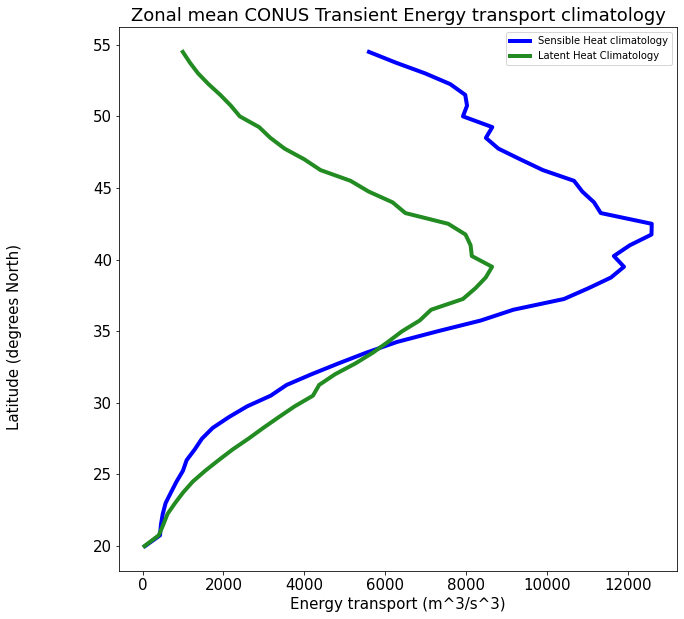

In [20]:
#Sensible heat
plt.figure(figsize=(10,10))
plt.title("Zonal mean CONUS Transient Energy transport climatology",fontsize=18)
plt.plot(zonal_mean_shtransients,zonal_mean_shtransients['lat'],label='Sensible Heat climatology',linewidth=4,color='blue')
plt.xlabel('Energy transport (m^3/s^3)',fontsize=15)
#plt.ylabel('Z (meters)',fontsize=15,rotation='90')
plt.gcf().text(-0.02,0.45, "Latitude (degrees North)", ha="center", va="center", rotation=90, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(zonal_mean_lhtransients,zonal_mean_lhtransients['lat'],label='Latent Heat Climatology ',linewidth=4,color='forestgreen')
plt.legend()